# Week 01
Using python (numpy) + opencv

Resources:
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#basic-ops

## Library Imports and prepare the sample image
We will use a color png image. This color image encodes the color as RGB (Red-Green-Blue) while *opencv* uses by default the BGR (Blue-Green-Red) encoding. We need to convert it before using it.

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

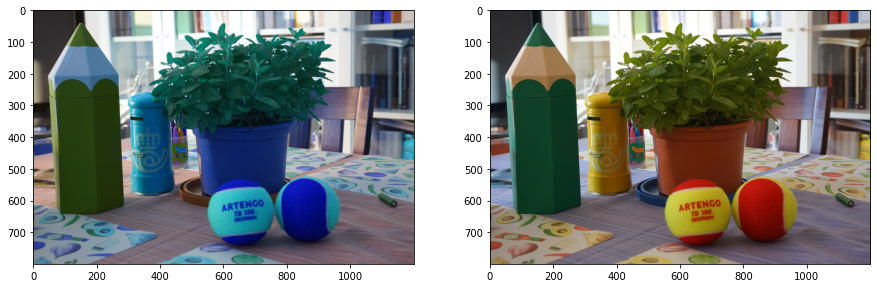

In [11]:
# Image example
photo = '../data/pencil_table.png'

# Open the image
img_cv = cv2.imread(photo)

# opencv uses BGR instead RGB, so make this conversion
img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# plot both to see the difference
fig = plt.figure(figsize=(15,10)) # format is two thirds
plt.subplot(121) # divide the display in 1 column 2 rows, select cell 1
plt.imshow(img_cv,'gray')
plt.subplot(122) # select cell 2
plt.imshow(img,'gray')
plt.show()

### Image basic properties

In [13]:
# print image shape (spatial x pixel dimensions, pixel dimension is three because color)
print(f"Image dimensions: {img.shape}")

# print image type (tell us how many bits per pixel)
print(f"Type of pixel: {img.dtype}")

# print image total size (in img.dtype)
print(f"Image size: {img.size}")

Image dimensions: (800, 1200, 3)
Type of pixel: uint8
Image size: 2880000


## Reduce Intensity levels 
Write a computer program capable of reducing the number of intensity levels in an image from 256 to 2, in integer powers of 2.

The desired number of intensity levels needs to be a variable input to your program.

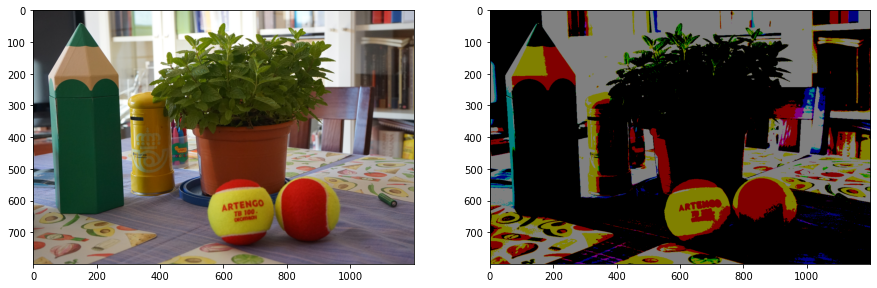

In [112]:
# input the number of levels, from 256 to 2
n_levels=2

MAX_LEVELS=256
K = MAX_LEVELS // n_levels #python integer division, equivalent to floor

# perform quantization. Make use of numpy broadcast mechanism
img_level = np.floor_divide(img,K) * K

# print side by side original and quantized to see the effect
fig = plt.figure(figsize=(15,10)) # format is two thirds
plt.subplot(121) # divide the display in 1 column 2 rows, select cell 1
plt.imshow(img,'gray')
plt.subplot(122) # select cell 2
plt.imshow(img_level,'gray')
plt.show()

## Spatial Average
Perform a simple spatial 3x3 average of image pixels. In other words,  replace the value of every pixel by the average of the values in its 3x3  neighborhood. If the pixel is located at (0,0), this means averaging  the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0),  (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the  image boundaries. Repeat the process for a 10x10 neighborhood and again  for a 20x20 neighborhood.

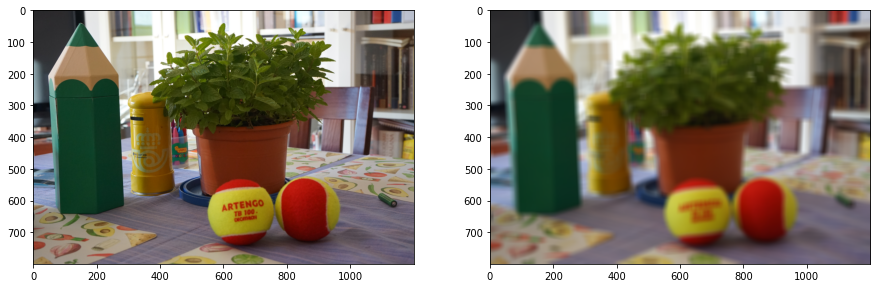

In [124]:
''' in opencv this can be achieved with 2D convoluitons with kernels of different sizes
https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
'''
n_size = 20 # neighborhood size
kernel = np.ones((n_size, n_size), np.float32)
kernel = kernel / np.sum(kernel)
img_spa = cv2.filter2D(img,-1,kernel)

# print side by side original and quantized to see the effect
fig = plt.figure(figsize=(15,10)) # format is two thirds
plt.subplot(121) # divide the display in 1 column 2 rows, select cell 1
plt.imshow(img,'gray')
plt.subplot(122) # select cell 2
plt.imshow(img_spa,'gray')
plt.show()

## Image Rotation
Rotate the image by 45 and 90 degrees.

We will use here the opensource package imutils (https://github.com/jrosebr1/imutils). 

You can install it with

`pip install imutils`

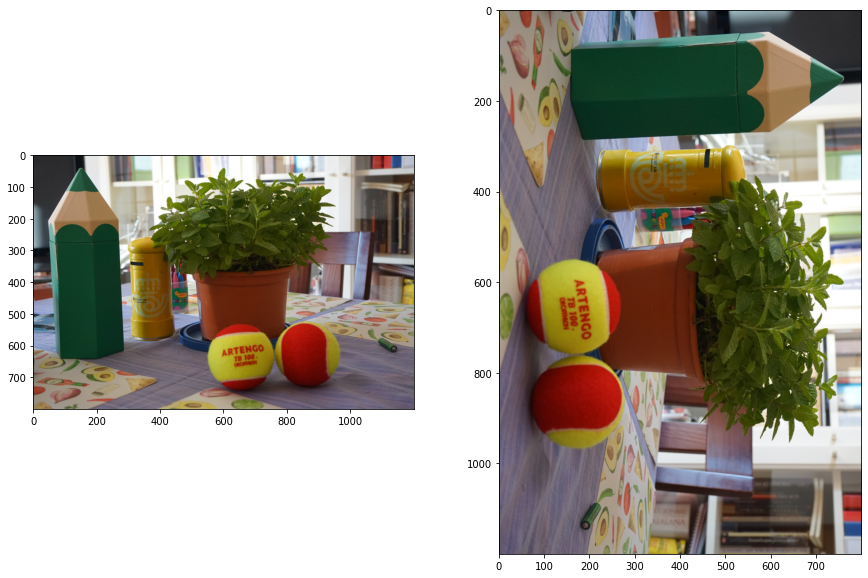

In [119]:
import imutils

angle = 90 # rotation angle
# note that this preserve the corners
img_rotated = imutils.rotate_bound(img, angle)

# print side by side original and to see the effect
fig = plt.figure(figsize=(15,10)) # format is two thirds
plt.subplot(121) # divide the display in 1 column 2 rows, select cell 1
plt.imshow(img,'gray')
plt.subplot(122) # select cell 2
plt.imshow(img_rotated,'gray')
plt.show()

## Reducing Spatial Image Resolution
For  every $3 \times 3$ block of the image (without overlapping), replace  all corresponding 9 pixels by their average. This operation simulates  reducing the image spatial resolution. Repeat this for $5 \times 5$  blocks and $7 \times 7$ blocks.

Original Image shpae: (800, 1200, 3)
Convoluted Image shape: (160, 240, 3)


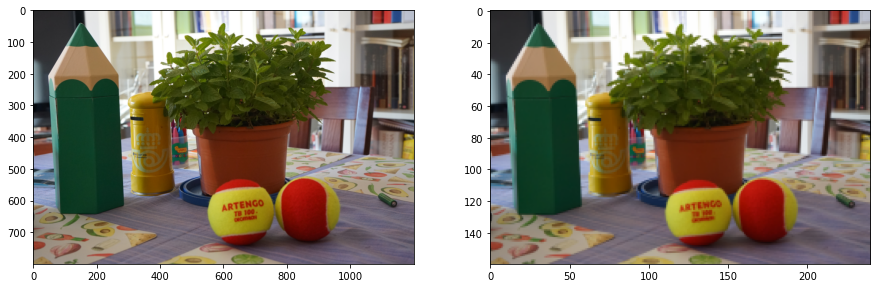

In [149]:
''' 
- extract the different channels (BRG) from the image
- perform the convolution for each pixel (will be overlapping)
- select pixels with a step such that the convolution window will not overlap
Perhaps not the most efficient way, but simpler to debug
'''
from scipy.ndimage import convolve
window_size = 5 # block size (window_size x window_size)

ch_img = [] # list of images where store each color BRG
ch_img  = cv2.split(img) # unpack all three color images

# convolution kernel. Together with reflect, not exact at the corners or sides
kernel = np.ones((window_size,window_size),np.float32)
kernel = kernel / np.sum(kernel)

# Perform convolution for each channel separately
ch_con = [convolve(ch, kernel, mode='reflect') for ch in ch_img]

# Resize, picking each window_size pixel. If dimension length in
# pixels not divisible, simple round-off image
ch_res = [ch[::window_size,::window_size] for ch in ch_con]

# merge again three color channels
img_res = cv2.merge(ch_res)

print(f"Original Image shpae: {img.shape}")
print(f"Convoluted Image shape: {img_res.shape}")

# print side by side original and to see the effect
fig = plt.figure(figsize=(15,10)) # format is two thirds
plt.subplot(121) # divide the display in 1 column 2 rows, select cell 1
plt.imshow(img,'gray')
plt.subplot(122) # select cell 2
plt.imshow(img_res,'gray')
plt.show()
